In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [ ]:
df = pd.read_csv("cardio_data_processed.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


# Data Understanding

In [ ]:
df.shape

(68205, 17)

The dataset consist of 17 columns and 68205 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

There are only two object/string variables, namely,  bp_category and bp_category_encoded. The other 15 variables are numeric.

## Drop useless variable

The variables 'id' and 'bp_category_encoded' are excluded from consideration as they are not considered to contribute meaningfully.

In [ ]:
df.drop(labels='id', axis=1, inplace=True)
df.drop('bp_category_encoded', axis = 1, inplace=True)

## Check for missing value

In [ ]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

No missing values were found in this dataset.

## Visualization

In [ ]:
cardio_counts = df['cardio'].value_counts()
cardio_counts

cardio
0    34533
1    33672
Name: count, dtype: int64

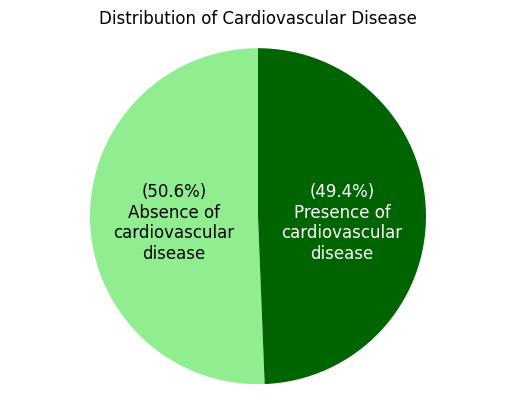

In [ ]:
colors = ['lightgreen', 'darkgreen']

plt.pie(cardio_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({cardio_counts[0]/sum(cardio_counts)*100:.1f}%)\nAbsence of\ncardiovascular\ndisease', color='black', fontsize=12, ha='center')
plt.text(0.5, -0.25, f'({cardio_counts[1]/sum(cardio_counts)*100:.1f}%)\nPresence of\ncardiovascular\ndisease', color='white', fontsize=12, ha='center')

plt.title('Distribution of Cardiovascular Disease')
plt.axis('equal')
plt.show()

49.4% of patients have cardiovascular disease, while the rest do not.

In [ ]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
1    44427
2    23778
Name: count, dtype: int64

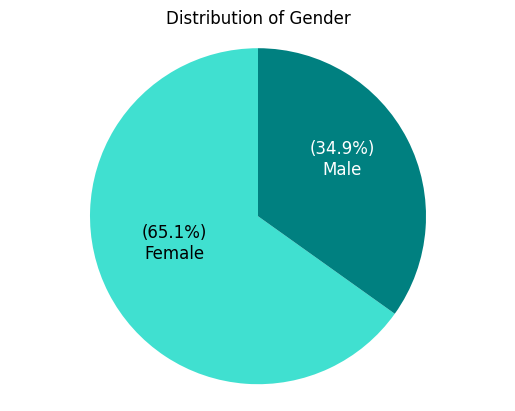

In [ ]:
colors = ['turquoise', 'teal']

plt.pie(gender_counts, colors = colors, startangle=90)

plt.text(-0.5, -0.25, f'({gender_counts[1]/sum(gender_counts)*100:.1f}%)\nFemale', color='black', fontsize=12, ha='center')
plt.text(0.5, 0.25, f'({gender_counts[2]/sum(gender_counts)*100:.1f}%)\nMale', color='white', fontsize=12, ha='center')

plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

65.1% of the gender in this data are female, the rest are male.

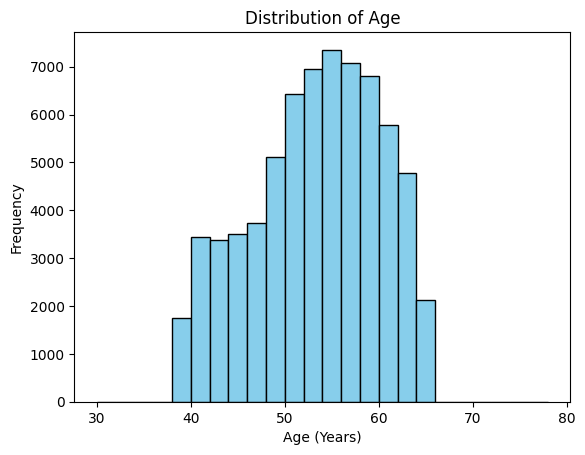

In [ ]:
plt.hist(df['age_years'], bins=range(30, 80, 2), color='skyblue', edgecolor='black')

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()

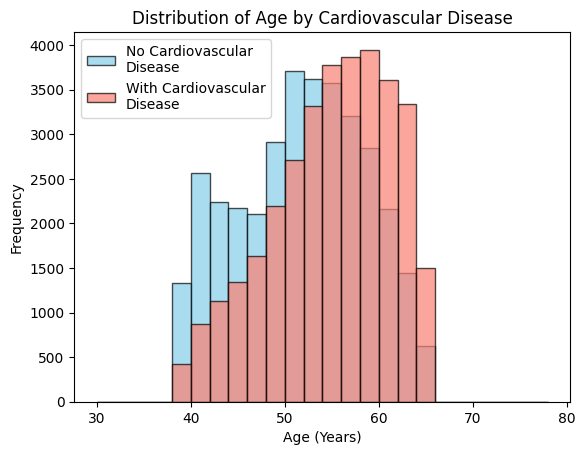

In [ ]:
age_no_cardio = df[df['cardio'] == 0]['age_years']
age_cardio = df[df['cardio'] == 1]['age_years']

bins = range(30, 80, 2)
plt.hist(age_no_cardio, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, label='No Cardiovascular\nDisease')
plt.hist(age_cardio, bins=bins, color='salmon', edgecolor='black', alpha=0.7, label='With Cardiovascular\nDisease')

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Cardiovascular Disease')
plt.legend(loc='upper left')
plt.show()

The distribution above shows that the age group most affected by cardiovascular disease is 52-64 years old.

## Correlation

In [ ]:
df_num = df.copy()
df_num.drop('bp_category', axis=1, inplace=True)
df_num.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [ ]:
df_num.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
age,1.000000,-0.023960,-0.082014,0.053321,0.211606,0.155999,0.155131,0.098540,-0.048078,-0.028970,-0.010297,0.239032,0.999092,0.085906
gender,-0.023960,1.000000,0.498323,0.156027,0.060722,0.066126,-0.037397,-0.021822,0.337758,0.170719,0.005206,0.006098,-0.024098,-0.096512
height,-0.082014,0.498323,1.000000,0.292679,0.018544,0.035550,-0.050957,-0.019317,0.187543,0.094354,-0.008241,-0.011276,-0.081974,-0.288037
weight,0.053321,0.156027,0.292679,1.000000,0.268289,0.250184,0.139816,0.105734,0.067169,0.067177,-0.017443,0.177829,0.053199,0.763079
ap_hi,0.211606,0.060722,0.018544,0.268289,1.000000,0.731812,0.195330,0.093151,0.026032,0.032536,-0.001409,0.433802,0.211314,0.230163
ap_lo,0.155999,0.066126,0.035550,0.250184,0.731812,1.000000,0.161637,0.073319,0.023836,0.036212,-0.001234,0.342900,0.155777,0.206944
cholesterol,0.155131,-0.037397,-0.050957,0.139816,0.195330,0.161637,1.000000,0.450452,0.009570,0.034184,0.008658,0.220778,0.154738,0.145234
gluc,0.098540,-0.021822,-0.019317,0.105734,0.093151,0.073319,0.450452,1.000000,-0.006109,0.009379,-0.008003,0.088905,0.098212,0.101253
smoke,-0.048078,0.337758,0.187543,0.067169,0.026032,0.023836,0.009570,-0.006109,1.000000,0.338226,0.024999,-0.016567,-0.048089,-0.027544
alco,-0.028970,0.170719,0.094354,0.067177,0.032536,0.036212,0.034184,0.009379,0.338226,1.000000,0.024339,-0.009038,-0.029052,0.014559


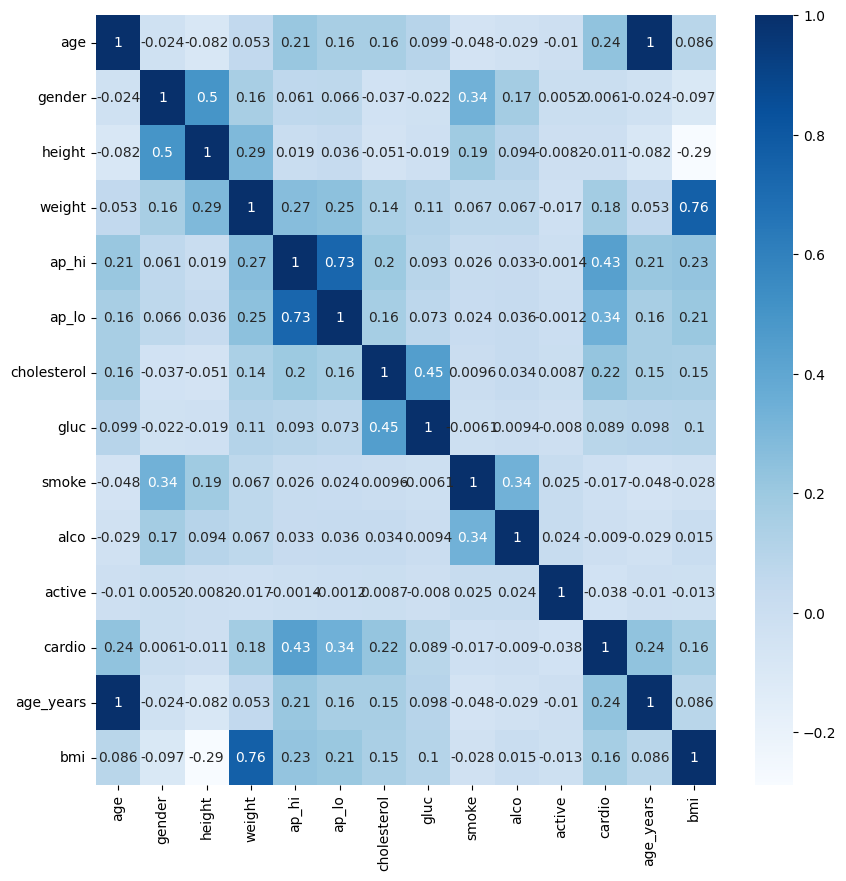

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)
plt.show()

Since the same thing is explained by 'age' and 'age_years', 'age' (in days) will be dropped.

In [ ]:
df.drop('age', axis = 1, inplace=True)

In [ ]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68205 non-null  int64  
 1   height       68205 non-null  int64  
 2   weight       68205 non-null  float64
 3   ap_hi        68205 non-null  int64  
 4   ap_lo        68205 non-null  int64  
 5   cholesterol  68205 non-null  int64  
 6   gluc         68205 non-null  int64  
 7   smoke        68205 non-null  int64  
 8   alco         68205 non-null  int64  
 9   active       68205 non-null  int64  
 10  cardio       68205 non-null  int64  
 11  age_years    68205 non-null  int64  
 12  bmi          68205 non-null  float64
 13  bp_category  68205 non-null  object 
dtypes: float64(2), int64(11), object(1)
memory usage: 7.3+ MB


## Split Data

The data is split into train (80%) and test (20%).

In [ ]:
df_input = df.drop('cardio', axis=1)
df_output = df['cardio']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size = 0.2, random_state = 25)

## Encoding

In [ ]:
x_train['bp_category'].value_counts()

bp_category
Hypertension Stage 1    31839
Hypertension Stage 2    12777
Normal                   7458
Elevated                 2490
Name: count, dtype: int64

The variable "bp_category" has four unique values: Hypertension Stage 1, Hypertension Stage 2, Normal, and Elevated.

One Hot Encoding is applied to bp_category.

In [ ]:
df = pd.get_dummies(df, columns=['bp_category'])

x_train_encoded = pd.get_dummies(x_train, columns=['bp_category'], dtype=int)
x_train_encoded['bp_category_Other'] = 0
x_train = x_train_encoded

x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal,bp_category_Other
15277,2,171,72.0,120,90,1,1,0,0,1,40,24.622961,0,0,1,0,0
24309,2,180,85.0,120,80,1,3,0,0,1,45,26.234568,0,1,0,0,0
57611,1,158,65.0,130,80,1,1,0,0,1,56,26.037494,0,1,0,0,0
52478,1,161,88.0,110,70,3,3,1,0,1,55,33.949308,0,0,0,1,0
10211,1,160,65.0,140,90,3,1,0,0,1,58,25.390625,0,0,1,0,0


In [ ]:
x_test_encoded = pd.get_dummies(x_test, columns=['bp_category'], dtype=int)
missing_cols = set(x_train_encoded.columns) - set(x_test_encoded.columns)

for col in missing_cols:
    x_test_encoded[col] = 0

x_test_encoded['bp_category_Other'] = 0

for col in x_test_encoded.columns:
    if col not in x_train_encoded.columns:
        x_test_encoded['bp_category_Other'] = x_test_encoded['bp_category_Other'] + x_test_encoded[col]
        x_test_encoded.drop(columns=[col], inplace=True)

x_test = x_test_encoded

In [ ]:
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal,bp_category_Other
15277,2,171,72.0,120,90,1,1,0,0,1,40,24.622961,0,0,1,0,0
24309,2,180,85.0,120,80,1,3,0,0,1,45,26.234568,0,1,0,0,0
57611,1,158,65.0,130,80,1,1,0,0,1,56,26.037494,0,1,0,0,0
52478,1,161,88.0,110,70,3,3,1,0,1,55,33.949308,0,0,0,1,0
10211,1,160,65.0,140,90,3,1,0,0,1,58,25.390625,0,0,1,0,0


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54564 entries, 15277 to 29828
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            54564 non-null  int64  
 1   height                            54564 non-null  int64  
 2   weight                            54564 non-null  float64
 3   ap_hi                             54564 non-null  int64  
 4   ap_lo                             54564 non-null  int64  
 5   cholesterol                       54564 non-null  int64  
 6   gluc                              54564 non-null  int64  
 7   smoke                             54564 non-null  int64  
 8   alco                              54564 non-null  int64  
 9   active                            54564 non-null  int64  
 10  age_years                         54564 non-null  int64  
 11  bmi                               54564 non-null  float64
 12  bp_ca

# Machine Learning Modelling and Evaluation

## Base Model

### Decision Tree (default)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

dt_class = DecisionTreeClassifier()
dt_class.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_predict = dt_class.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, dt_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      6919
           1       0.64      0.62      0.63      6722

    accuracy                           0.64     13641
   macro avg       0.64      0.64      0.64     13641
weighted avg       0.64      0.64      0.64     13641



### Decision Tree (using GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

# scorer for recall class 1
scorer = make_scorer(recall_score, pos_label=1)

In [ ]:
dt_class2 = DecisionTreeClassifier()
dt_class2= GridSearchCV(dt_class2, param_grid = parameters,
                        scoring = scorer, cv = 5)

In [ ]:
dt_class2.fit(x_train, y_train)
print("Best parameters found: ", dt_class2.best_params_)
print("Best cross-validation score: ", dt_class2.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 4}
Best cross-validation score:  0.719517625231911


In [ ]:
dt_class_best = dt_class2.best_estimator_
dt_class_best.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
dt_pred_best = dt_class_best.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, dt_pred_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      6919
           1       0.73      0.71      0.72      6722

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



### KNN-Classification (default)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier()
knn_class.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predict = knn_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, knn_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      6919
           1       0.70      0.66      0.68      6722

    accuracy                           0.69     13641
   macro avg       0.69      0.69      0.69     13641
weighted avg       0.69      0.69      0.69     13641



### KNN (using GridSearchCV)

In [ ]:
parameters = {'n_neighbors':[5,7],
    'weights':['uniform','distance'],
}

# scorer for recall class 1
scorer = make_scorer(recall_score, pos_label=1)

In [ ]:
knn_class2 = KNeighborsClassifier()
knn_class2= GridSearchCV(knn_class2, param_grid = parameters,
                         scoring = scorer, cv = 5)

In [ ]:
knn_class2.fit(x_train,y_train)
print("Best parameters found: ", knn_class2.best_params_)
print("Best cross-validation score: ", knn_class2.best_score_)

Best parameters found:  {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score:  0.6654545454545454


In [ ]:
knn_class_best = knn_class2.best_estimator_
knn_class_best.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_pred_best = knn_class_best.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, knn_pred_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      6919
           1       0.71      0.66      0.68      6722

    accuracy                           0.70     13641
   macro avg       0.70      0.70      0.70     13641
weighted avg       0.70      0.70      0.70     13641



### Logistic Regression (using Cross Validation)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_class = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

scorer = make_scorer(recall_score, pos_label=1)

scores = cross_val_score(logreg_class, x_train, y_train, cv = 5, scoring = scorer)
print('accuracy of test set for each fold: ', scores)

accuracy of test set for each fold:  [0.65788497 0.65009276 0.65974026 0.65176252 0.63562152]


In [ ]:
logreg_class.fit(x_train,y_train)
logreg_predict = logreg_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, logreg_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6919
           1       0.76      0.65      0.70      6722

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



### Naïve Bayes    

Since half of the data is continuous and the rest is discrete, both Gaussian and Multinomial methods are conducted.

#### Using GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_class = GaussianNB()
nb_class.fit(x_train, y_train)

GaussianNB()

In [ ]:
nb_predict = nb_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, nb_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      6919
           1       0.75      0.61      0.67      6722

    accuracy                           0.71     13641
   macro avg       0.71      0.71      0.70     13641
weighted avg       0.71      0.71      0.70     13641



#### Using MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_class2 = MultinomialNB()
nb_class2.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb_predict2 = nb_class2.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, nb_predict2, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      6919
           1       0.75      0.59      0.66      6722

    accuracy                           0.70     13641
   macro avg       0.71      0.70      0.70     13641
weighted avg       0.71      0.70      0.70     13641



Based on the base models above, it can be concluded that the Decision Tree model, optimized with GridSearchCV (using entropy and a max depth of 4), achieves the highest Recall score for class 1, which is 0.71. Therefore, this model will be used for ensemble learning.

## Ensamble Learning

### Bagging (default)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bagging_class = BaggingClassifier()
bagging_class.fit(x_train, y_train)

BaggingClassifier()

In [ ]:
bagging_predict = bagging_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, bagging_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      6919
           1       0.70      0.64      0.67      6722

    accuracy                           0.69     13641
   macro avg       0.69      0.69      0.69     13641
weighted avg       0.69      0.69      0.69     13641



### Bagging - Decision Tree

In [ ]:
dt_bagg = BaggingClassifier(base_estimator = dt_class_best, random_state=25)
dt_bagg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4),
                  random_state=25)

In [ ]:
dt_bagg_pred = dt_bagg.predict(x_test)
dt_bagg_pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, dt_bagg_pred, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      6919
           1       0.73      0.71      0.72      6722

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



### Boosting (default)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ADABoost_class = AdaBoostClassifier()
ADABoost_class.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
boosting_predict = ADABoost_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, boosting_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6919
           1       0.77      0.64      0.70      6722

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.72     13641
weighted avg       0.73      0.73      0.72     13641



### Boosting - Decision Tree

In [ ]:
dt_boost = AdaBoostClassifier(base_estimator = dt_class_best, random_state=25)
dt_boost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4),
                   random_state=25)

In [ ]:
dt_boost_pred = dt_boost.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, dt_boost_pred, target_names = ['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6919
           1       0.75      0.67      0.71      6722

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



### Stacking (default)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42))),
    ('dt_best', dt_class_best)
]

stacking_class = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_class.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))])),
                               ('dt_best',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=4))],
                   final_estimator=LogisticRegression())

In [ ]:
stacking_predict = stacking_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, stacking_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6919
           1       0.76      0.66      0.71      6722

    accuracy                           0.73     13641
   macro avg       0.74      0.73      0.73     13641
weighted avg       0.74      0.73      0.73     13641



### Random Forest (default)

In [ ]:
rf_class = RandomForestClassifier(random_state=25)
rf_class.fit(x_train, y_train)

RandomForestClassifier(random_state=25)

In [ ]:
rf_predict = rf_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, rf_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6919
           1       0.72      0.70      0.71      6722

    accuracy                           0.71     13641
   macro avg       0.71      0.71      0.71     13641
weighted avg       0.71      0.71      0.71     13641



### Random Forest (Using GridSearchCV)

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,4,6,8],
}

# scorer for recall class 1
scorer = make_scorer(recall_score, pos_label=1)

In [ ]:
rf_class2 = RandomForestClassifier(random_state=42)
rf_class2 = GridSearchCV(rf_class2, parameters, scoring = scorer, cv=5)

In [ ]:
rf_class2.fit(x_train,y_train)
print("Best parameters found: ", rf_class2.best_params_)
print("Best cross-validation score: ", rf_class2.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 8}
Best cross-validation score:  0.6670500927643784


In [ ]:
rf_class_best = rf_class2.best_estimator_
rf_class_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

In [ ]:
rf_predict_best = rf_class_best.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, rf_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6919
           1       0.76      0.66      0.71      6722

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



# Summary

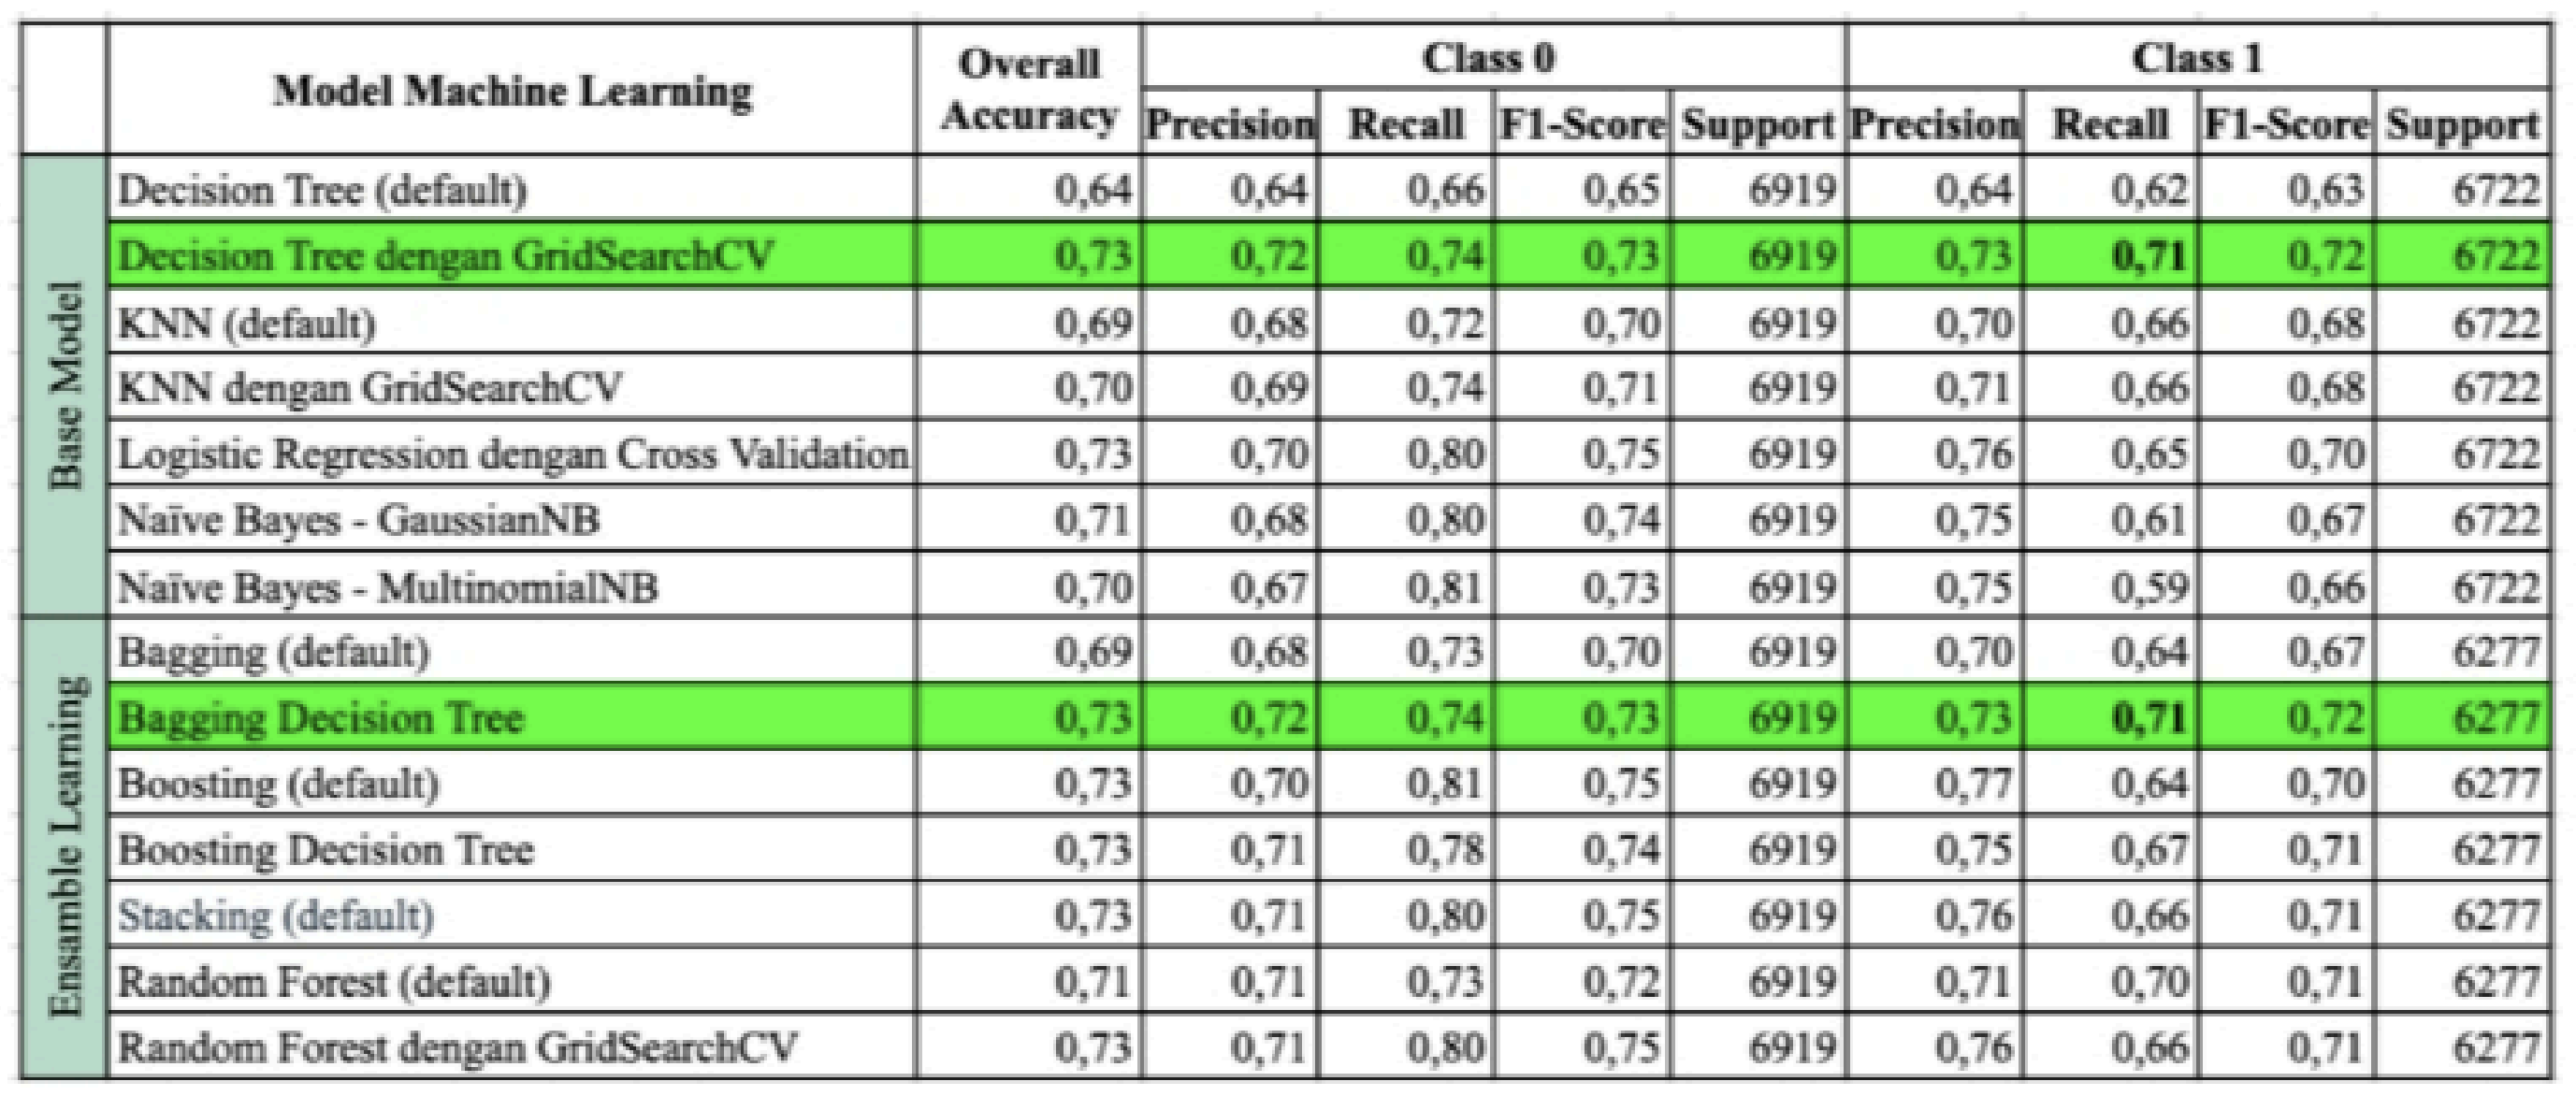

In total, 14 learning models were utilized, categorized into non-ensemble and ensemble models. From the evaluations of these models, it was found that the Decision Tree model, optimized with GridSearchCV (using entropy and a max depth of 4), achieved the highest Recall for class 1, with a value of 0.71. The Bagging results using this Decision Tree model showed the same evaluation values. Given our goal to obtain a model with the highest Recall for class 1 while also favoring simplicity and short execution time, we have determined that the Decision Tree model using GridSearchCV (with entropy and a max depth of 4) is the most suitable model.

# Visualization of the Best Model

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(dt_class_best, out_file="tree.dot", feature_names=x_train.columns)

In [ ]:
with open("tree.dot") as f:
  dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render("decision_tree")

'decision_tree.pdf'